In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  
import json
import os
from datetime import datetime
# import plotly.graph_objects as go
# from Custom_tools.plotting_utils import plot_ohlc_with_sr

In [ ]:
stock_name = "icicibank"
# filename = input("Enter filename in capital letters: ")
filename = "2025_no_validation_XGB"
timeframe = 5
# version = input("Enter you version")

In [ ]:
print(filename)

2025_no_validation_XGB


In [ ]:
# columns_to_drop = ["atr","rsi","sma_50","sma_200","sma_20","uptrend","support","resistance"]
columns_to_drop = ['atr', 'support', 'resistance']

In [ ]:
# df = pd.read_csv(f"../raw_data_for_machine_learning/{filename}.csv").set_index("datetime").drop(columns=columns_to_drop)
# df.index = pd.to_datetime(df.index)
df = pd.read_csv(f"./{stock_name}/{filename}.csv").set_index("datetime").drop(columns=columns_to_drop)
df.index = pd.to_datetime(df.index)

FileNotFoundError: [Errno 2] No such file or directory: './icicibank/2025_no_validation_XGB.csv'

In [ ]:
df['ml_target'].isna().value_counts()

ml_target
False    148938
Name: count, dtype: int64

In [ ]:
df['ml_target_short'].isna().value_counts()

ml_target_short
False    148938
Name: count, dtype: int64

In [ ]:
df['ml_target'] = np.where(
    df['ml_target'].isna(), 
    0,
    np.where(df['ml_target'] > 0, 1, -1)
)

df['ml_target_short'] = np.where(
    df['ml_target_short'].isna(), 
    0,
    np.where(df['ml_target_short'] > 0, 1, -1)
)


In [ ]:
print(df['ml_target'].value_counts(dropna=False))
print(df['ml_target_short'].value_counts(dropna=False))


ml_target
-1    148233
 1       705
Name: count, dtype: int64
ml_target_short
-1    148503
 1       435
Name: count, dtype: int64


In [ ]:
df['ml_target_combined'] = (
    df['ml_target']
    .where(df['ml_target'] != 0, df['ml_target_short'])
)


#### Data Wrangling

In [ ]:
# ["ADANIPORTS","AXISBANK","HDFCBANK", "HINDALCO","ICICIBANK", "INFY", "M&M", "RELIANCE", "POWERGRID", "SBIN"]

In [ ]:
# df = pd.read_csv(f"../Data/1_minute_data/{filename}").set_index("datetime")
# df.index = pd.to_datetime(df.index)

In [ ]:
# df = pd.read_parquet(
#     f"s3://quant-ohlcv-data/ohlcv/timeframe={timeframe}min/symbol={filename}/"
# )
# if "datetime" in df.columns:
#     df = df.set_index("datetime")

In [ ]:
# start_date = pd.Timestamp("2023-02-01", tz="Asia/Kolkata")
# end_date   = pd.Timestamp("2025-12-31", tz="Asia/Kolkata")

# df = df.loc[start_date:end_date]

In [ ]:
df.head()

,open,high,low,close,volume,ml_target,ml_target_short,prev_close,tr,hour,...,sr_range_atr,resistance_breakout_strength,support_breakdown_strength,resistance_breakout_conviction,support_breakdown_conviction,breakout_volume_ratio,resistance_touch_count,support_touch_count,ml_target_combined,y_pred
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-03 14:20:00+05:30,407.75,408.40,407.60,407.6,40092,-1,-1,407.75,0.80,14,...,1.875389,0.0,0.000000,-1.0,-0.904762,0.550515,4.0,3.0,-1,1
2018-01-03 14:25:00+05:30,407.60,408.00,406.05,406.6,88975,-1,-1,407.60,1.95,14,...,1.813253,0.0,0.000000,-1.0,-1.000000,0.619121,4.0,3.0,-1,1
2018-01-03 14:30:00+05:30,406.60,407.40,406.00,407.0,77136,-1,-1,406.60,1.40,14,...,1.818731,0.0,0.169184,-1.0,0.102564,1.393874,4.0,3.0,-1,1
2018-01-03 14:35:00+05:30,407.05,407.05,405.15,405.9,112888,-1,-1,407.00,1.90,14,...,1.837989,0.0,0.000000,-1.0,-0.285714,1.182167,4.0,3.0,-1,1
2018-01-03 14:40:00+05:30,405.90,406.85,405.50,406.5,68262,-1,-1,405.90,1.35,14,...,1.768817,0.0,0.526882,-1.0,0.368421,1.632450,4.0,3.0,-1,1


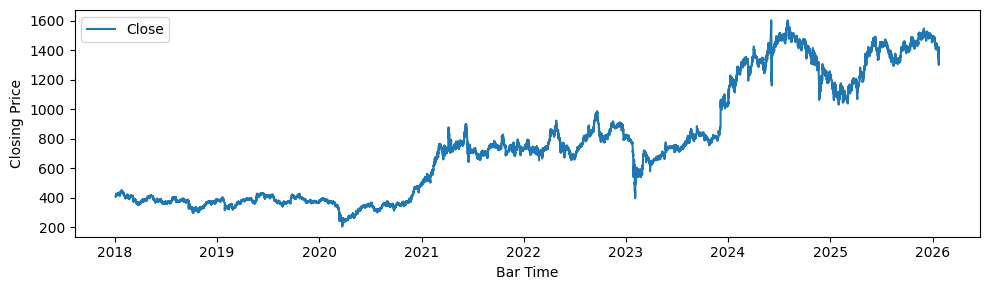

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(df["close"], label="Close")

ax.set_xlabel("Bar Time")
ax.set_ylabel("Closing Price")

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df["resistance"] = df["close"].shift().rolling(10).max()
df["support"]    = df["close"].shift().rolling(10).min()

df= df.dropna(how="any")


In [ ]:
df[["close","support","resistance"]].head()

,close,support,resistance
datetime,,,
2018-01-03 15:10:00+05:30,407.20,405.9,407.60
2018-01-03 15:15:00+05:30,407.25,405.9,407.60
2018-01-03 15:20:00+05:30,407.80,405.9,407.60
2018-01-03 15:25:00+05:30,407.95,405.9,407.80
2018-01-03 15:30:00+05:30,408.75,406.5,407.95


In [ ]:
# plot_ohlc_with_sr(df.tail(75))

In [ ]:
df[["close", "high", "low", "support", "resistance"]].head()

,close,high,low,support,resistance
datetime,,,,,
2018-01-03 15:10:00+05:30,407.20,408.25,406.60,405.9,407.60
2018-01-03 15:15:00+05:30,407.25,407.70,406.50,405.9,407.60
2018-01-03 15:20:00+05:30,407.80,408.25,407.00,405.9,407.60
2018-01-03 15:25:00+05:30,407.95,408.05,407.45,405.9,407.80
2018-01-03 15:30:00+05:30,408.75,408.90,407.60,406.5,407.95


    ATR implementation for stop loss

In [ ]:
# Calculate True Range (Wilder's definition)
df['prev_close'] = df['close'].shift(1)
df['tr'] = df[['high', 'low', 'prev_close']].apply(
    lambda x: max(x['high'] - x['low'], 
                      abs(x['high'] - x['prev_close']), 
                                        abs(x['low'] - x['prev_close'])), axis=1
                                        )
df['atr'] = df['tr'].shift().rolling(14).mean()

#### Indicators as filter

In [ ]:
# Calculate RSI (14-period standard)
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI
df['rsi'] = calculate_rsi(df['close'], period=14).shift()  # shift to avoid lookahead


#### Creating Strategy

    Adding a trend filter.

In [ ]:
# Add simple trend filter
df['sma_50'] = df['close'].shift().rolling(50).mean()
df['sma_200'] = df['close'].shift().rolling(200).mean()
df["sma_20"] = df["close"].shift().rolling(20).mean() 

# Uptrend: price > SMA50 > SMA200
df['uptrend'] = (
                 (df['sma_50'] > df['sma_200']) &
                 (df["close"]>df["sma_20"])
                 ).astype(int)

df["downtrend"] = ( 
                 (df['sma_50']< df['sma_200']) &
                 (df["close"]<df["sma_20"])
                 ).astype(int)


    Calculating Entry Signal 

In [ ]:
df['entry_signal'] = (
    (df['low'] <= df['support']) &
    (df['rsi'] > 35) &
    (df['rsi'] < 55) &
    (df['uptrend'] == 1)
    & (df['y_pred'] == 1)
).astype(int)


    Calculating Entry Price

In [ ]:
df["entry_price"] = np.where(df["entry_signal"]==1, df["support"], np.nan)

    Calculating Exit conditions

In [ ]:
df["target_price"] = np.where(df["entry_signal"]==1, df["resistance"], np.nan )

df["stop_loss_price"] = np.where(df["entry_signal"]==1, df["entry_price"]-(1 * df["atr"]), np.nan)

#### Creating positions

    Initializing variables

#### Creating Long Positions

In [ ]:
#INitializing trade pnl logic
df["trade_pnl"] = 0.0
df["exit_reason"] = ''
df["in_position"] = 0
trade_pnls = []
starting_capital = df.iloc[0]['close']
# starting_capital = 10000


entry_price = np.nan
stop_price = np.nan
target_price = np.nan
in_trade = False
TRANSACTION_COST = 0.0002

#For machine Learning
entry_index = None
df["ml_target"] =  np.nan
df["holding_period"] = np.nan

In [ ]:
for i in range(len(df)):
    idx = df.index[i]

    #Mark if we are in position in this bar

    df.loc[idx, "in_position"] = 1 if  in_trade else 0


    #Exit logic first

    if in_trade:
        current_low = df.loc[idx, "low"]
        current_high = df.loc[idx, "high"]

        #Exit conditions
        if current_low<= stop_price:
            exit_price = stop_price
            exit_reason = "STOP" 
        elif current_high >= target_price:
            exit_price = target_price
            exit_reason = "TARGET"
        else:
            exit_price = None
        #Calculating PNL
        if exit_price is not None:
            pnl_per_share_gross = exit_price - entry_price
            
            #Calculating transaction cost
            cost_entry_per_share = entry_price * TRANSACTION_COST
            cost_exit_per_share = exit_price * TRANSACTION_COST
            total_cost_per_share = cost_entry_per_share + cost_exit_per_share

            pnl_per_share_net = pnl_per_share_gross - total_cost_per_share

            #Calculate position size
            # position_value = starting_capital
            # shares = position_value/entry_price
            shares = 1

            #Total pnl for the position
            pnl_total_gross = pnl_per_share_gross * shares
            total_cost_total = total_cost_per_share * shares
            pnl_total_net = pnl_per_share_net * shares

            trade_pnls.append(pnl_total_net)

            # Assign to dataframe at exit bar

            df.loc[idx, 'trade_pnl'] =  pnl_total_net
            df.loc[idx, 'exit_reason'] = exit_reason
            # Use percentage return (comparable across stocks):
            df.loc[entry_index, 'ml_target'] = (pnl_per_share_net / entry_price) * 100
            df.loc[entry_index, "holding_period"] = i - df.index.get_loc(entry_index)


            #Reset state

            in_trade = False
            entry_price = np.nan
            stop_price = np.nan
            target_price = np.nan
    
    #Entry logic
    elif df.loc[idx, "entry_signal"] == 1:
        in_trade = True
        entry_price = df.loc[idx, "entry_price"]
        stop_price = df.loc[idx, "stop_loss_price"]
        target_price = df.loc[idx, "target_price"]

        entry_index = idx

 

In [ ]:
np.sum(trade_pnls)

np.float64(1240.0725235714265)

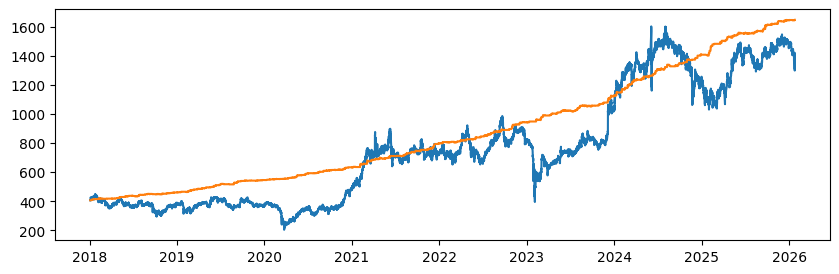

In [ ]:
df["cumulative_pnl"] = df["trade_pnl"].cumsum()
df["equity_curve"] = starting_capital + df["cumulative_pnl"]

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df["close"])
ax.plot(df["equity_curve"])

In [ ]:
df['ml_target'].values

array([nan, nan, nan, ..., nan, nan, nan], shape=(148928,))

In [ ]:
df['ml_target'].notna().sum()

np.int64(969)

In [ ]:
df['ml_target'].isna().sum()

np.int64(147959)

In [ ]:
# Add this right after your loop
print(f"\nTotal trades executed: {len(trade_pnls)}")
print(f"ML targets stored: {df['ml_target'].notna().sum()}")
print(f"Entry signals: {(df['entry_signal'] == 1).sum()}")


Total trades executed: 969
ML targets stored: 969
Entry signals: 1187


#### Adding shorting opportunities

In [ ]:
df['entry_signal_short'] = (
    (df['high'] >= df['resistance']) &
    (df['rsi'] > 50) &  # Price showing strength/overbought
    (df['rsi'] < 70)   # But not extremely overbought
    & (df['downtrend'] == 1)
    & (df['y_pred'] == 1)
).astype(int)

In [ ]:
# Entry at close when price touches resistance
df["entry_price_short"] = np.where(df["entry_signal_short"]==1, 
                                    df["resistance"], 
                                    np.nan)

In [ ]:

df["target_price_short"] = np.where(df["entry_signal_short"]==1, 
                                    df["support"],  # or df["close"] - (2 * df["atr"])
                                    np.nan)

# Stop ABOVE entry (correct - you have this right!)
df["stop_loss_price_short"] = np.where(df["entry_signal_short"]==1, 
                                       df["entry_price_short"] + (1 * df["atr"]), 
                                       np.nan)

In [ ]:
# Initializing trade pnl logic for SHORTS
df["trade_pnl_short"] = 0.0
df["exit_reason_short"] = ''
df["in_position_short"] = 0
trade_pnls_short = []
starting_capital_short = df.iloc[0]['close']
# starting_capital_short = 10000

entry_price_short = np.nan
stop_price_short = np.nan
target_price_short = np.nan
in_trade_short = False
TRANSACTION_COST_SHORT = 0.0002  # Consider if shorts have higher costs

# For machine learning
entry_index_short = None
df["ml_target_short"] = np.nan
df["holding_period_short"] = np.nan

In [ ]:
for i in range(len(df)):
    idx = df.index[i]

    # Mark if we are in position in this bar
    df.loc[idx, "in_position_short"] = 1 if in_trade_short else 0

    # Exit logic first
    if in_trade_short:
        current_low = df.loc[idx, "low"]
        current_high = df.loc[idx, "high"]

        # Exit conditions (INVERTED for shorts)
        if current_high >= stop_price_short:  # Stop hit when price goes UP
            exit_price = stop_price_short
            exit_reason = "STOP" 
        elif current_low <= target_price_short:  # Target hit when price goes DOWN
            exit_price = target_price_short
            exit_reason = "TARGET"
        else:
            exit_price = None
            
        # Calculating PNL
        if exit_price is not None:
            # INVERTED: profit when exit < entry for shorts
            pnl_per_share_gross = entry_price_short - exit_price  
            
            # Calculating transaction cost
            cost_entry_per_share = entry_price_short * TRANSACTION_COST_SHORT
            cost_exit_per_share = exit_price * TRANSACTION_COST_SHORT
            total_cost_per_share = cost_entry_per_share + cost_exit_per_share

            pnl_per_share_net = pnl_per_share_gross - total_cost_per_share

            # Calculate position size
            # position_value = starting_capital_short
            # shares = position_value / entry_price_short
            shares = 1

            # Total pnl for the position
            pnl_total_gross = pnl_per_share_gross * shares
            total_cost_total = total_cost_per_share * shares
            pnl_total_net = pnl_per_share_net * shares

            trade_pnls_short.append(pnl_total_net)

            # Assign to dataframe at exit bar
            df.loc[idx, 'trade_pnl_short'] = pnl_total_net
            df.loc[idx, 'exit_reason_short'] = exit_reason
            
            # Use percentage return (comparable across stocks):
            df.loc[entry_index_short, 'ml_target_short'] = (pnl_per_share_net / entry_price_short) * 100
            df.loc[entry_index_short, "holding_period_short"] = i - df.index.get_loc(entry_index_short)

            # Reset state
            in_trade_short = False
            entry_price_short = np.nan
            stop_price_short = np.nan
            target_price_short = np.nan
    
    # Entry logic
    elif (df.loc[idx, "entry_signal_short"] == 1) and (not in_trade_short):

        in_trade_short = True
        entry_price_short = df.loc[idx, "entry_price_short"]
        stop_price_short = df.loc[idx, "stop_loss_price_short"]
        target_price_short = df.loc[idx, "target_price_short"]
        
        entry_index_short = idx

In [ ]:
df["ml_target_short"].notna().sum()

np.int64(600)

In [ ]:
df["ml_target_short"].isna().sum()

np.int64(148328)

In [ ]:
np.sum(trade_pnls_short)

np.float64(791.7325407142844)

In [ ]:
df["trade_pnl_total"] = df["trade_pnl"] + df["trade_pnl_short"]


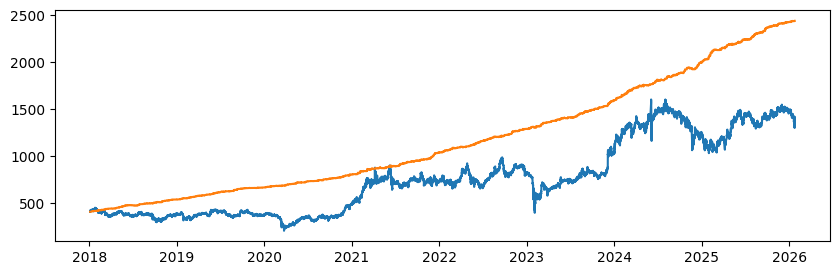

In [ ]:
df["cumulative_pnl"] = df["trade_pnl_total"].cumsum()
df["equity_curve"] = starting_capital + df["cumulative_pnl"]

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df["close"])
ax.plot(df["equity_curve"])

#### Year On Year Results

C:\Users\LuvRatan\AppData\Local\Temp\ipykernel_22428\3620161310.py:43: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_df = df.groupby('year').apply(calculate_year_metrics).reset_index()


YEAR-ON-YEAR PERFORMANCE
 year  Start Equity  End Equity  Total Return (%)  Max Drawdown (%)  Trades  Win Rate (%)  Avg Win  Avg Loss  Sharpe Ratio
 2018    407.200000  538.147513         32.158034         -1.632488   198.0     72.222222 1.366214 -1.171292      0.700278
 2019    538.147513  665.304316         23.628615         -0.883196   211.0     71.090047 1.247862 -0.983975      0.703075
 2020    665.304316  802.111321         20.563072         -0.725433   205.0     67.804878 1.498729 -1.083580      0.632273
 2021    802.111321 1039.378046         29.580274         -1.543331   170.0     70.588235 3.040013 -2.550696      0.604852
 2022   1039.378046 1288.392021         23.957979         -0.699959   159.0     72.327044 3.049022 -2.309627      0.714525
 2023   1288.392021 1591.864700         23.554374         -0.782887   212.0     73.584906 2.777282 -2.317559      0.762171
 2024   1591.864700 1993.829671         25.251202         -0.965814   204.0     70.588235 4.404169 -3.870588      

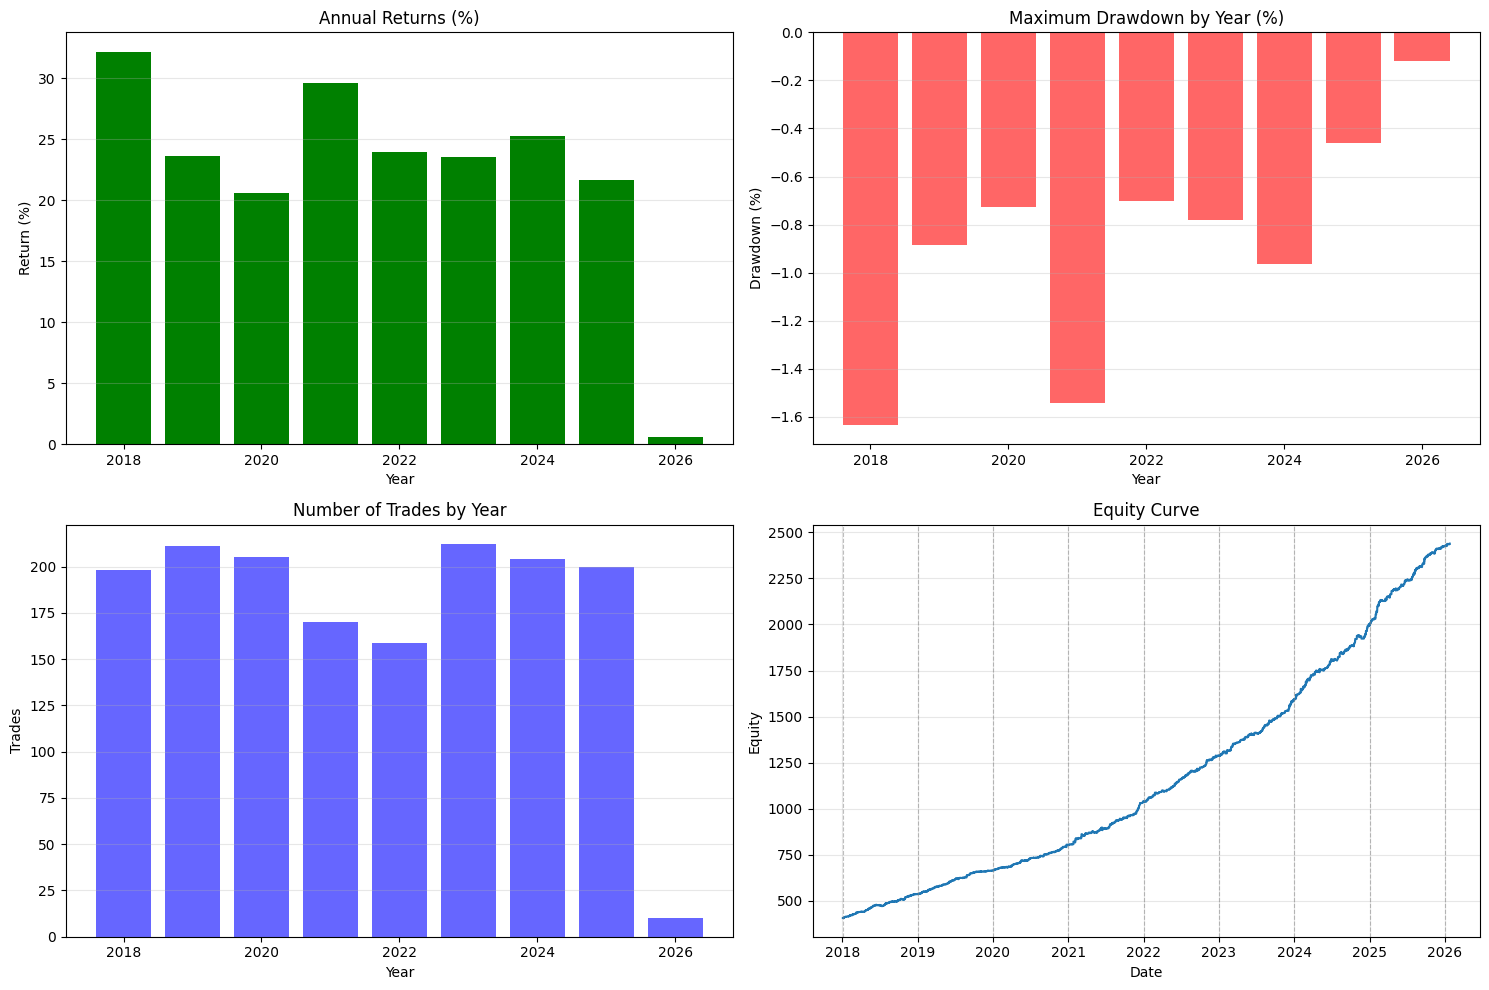

,year,Start Equity,End Equity,Total Return (%),Max Drawdown (%),Trades,Win Rate (%),Avg Win,Avg Loss,Sharpe Ratio
0,2018,407.200000,538.147513,32.158034,-1.632488,198.0,72.222222,1.366214,-1.171292,0.700278
1,2019,538.147513,665.304316,23.628615,-0.883196,211.0,71.090047,1.247862,-0.983975,0.703075
2,2020,665.304316,802.111321,20.563072,-0.725433,205.0,67.804878,1.498729,-1.083580,0.632273
3,2021,802.111321,1039.378046,29.580274,-1.543331,170.0,70.588235,3.040013,-2.550696,0.604852
4,2022,1039.378046,1288.392021,23.957979,-0.699959,159.0,72.327044,3.049022,-2.309627,0.714525
5,2023,1288.392021,1591.864700,23.554374,-0.782887,212.0,73.584906,2.777282,-2.317559,0.762171
6,2024,1591.864700,1993.829671,25.251202,-0.965814,204.0,70.588235,4.404169,-3.870588,0.679176
7,2025,1993.829671,2425.091817,21.629839,-0.461823,200.0,72.000000,4.295569,-3.344638,0.748383
8,2026,2425.091817,2439.005064,0.573720,-0.119907,10.0,60.000000,3.784273,-2.198098,0.556661


In [ ]:
df['year'] = df.index.year

# Group by year and calculate metrics
def calculate_year_metrics(group):
    # Equity metrics
    start_equity = group['equity_curve'].iloc[0]
    end_equity = group['equity_curve'].iloc[-1]
    year_return = (end_equity - start_equity) / start_equity * 100
    
    # Drawdown
    running_max = group['equity_curve'].cummax()
    drawdown = (group['equity_curve'] - running_max) / running_max * 100
    max_drawdown = drawdown.min()
    
    # Trade metrics
    trades = group[group['trade_pnl_total'] != 0]
    num_trades = len(trades)
    winning_trades = len(trades[trades['trade_pnl_total'] > 0])
    losing_trades = len(trades[trades['trade_pnl_total'] < 0])
    win_rate = (winning_trades / num_trades * 100) if num_trades > 0 else 0
    
    # Average win/loss
    avg_win = trades[trades['trade_pnl_total'] > 0]['trade_pnl_total'].mean() if winning_trades > 0 else 0
    avg_loss = trades[trades['trade_pnl_total'] < 0]['trade_pnl_total'].mean() if losing_trades > 0 else 0
    
    # Sharpe ratio
    daily_returns = group['equity_curve'].pct_change().dropna()
    sharpe = np.sqrt(252) * daily_returns.mean() / daily_returns.std() if len(daily_returns) > 1 and daily_returns.std() > 0 else 0
    
    return pd.Series({
        'Start Equity': start_equity,
        'End Equity': end_equity,
        'Total Return (%)': year_return,
        'Max Drawdown (%)': max_drawdown,
        'Trades': num_trades,
        'Win Rate (%)': win_rate,
        'Avg Win': avg_win,
        'Avg Loss': avg_loss,
        'Sharpe Ratio': sharpe
    })

# Apply to all years at once
yearly_df = df.groupby('year').apply(calculate_year_metrics).reset_index()

# Calculate overall CAGR
first_equity = df['equity_curve'].iloc[0]
last_equity = df['equity_curve'].iloc[-1]
years_total = (df.index[-1] - df.index[0]).days / 365.25
cagr = ((last_equity / first_equity) ** (1 / years_total) - 1) * 100

# Overall max drawdown
running_max_all = df['equity_curve'].cummax()
drawdown_all = (df['equity_curve'] - running_max_all) / running_max_all * 100
max_dd_all = drawdown_all.min()

print("=" * 80)
print("YEAR-ON-YEAR PERFORMANCE")
print("=" * 80)
print(yearly_df.to_string(index=False))
print("\n" + "=" * 80)
print("OVERALL METRICS")
print("=" * 80)
print(f"Starting Capital: ₹{first_equity:,.2f}")
print(f"Ending Capital: ₹{last_equity:,.2f}")
print(f"Total Return: {((last_equity/first_equity - 1) * 100):.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Max Drawdown: {max_dd_all:.2f}%")
print(f"Total Period: {years_total:.2f} years")
print("=" * 80)

# Same visualizations as before
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(yearly_df['year'], yearly_df['Total Return (%)'], 
               color=['green' if x > 0 else 'red' for x in yearly_df['Total Return (%)']])
axes[0, 0].set_title('Annual Returns (%)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

axes[0, 1].bar(yearly_df['year'], yearly_df['Max Drawdown (%)'], color='red', alpha=0.6)
axes[0, 1].set_title('Maximum Drawdown by Year (%)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Drawdown (%)')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].bar(yearly_df['year'], yearly_df['Trades'], color='blue', alpha=0.6)
axes[1, 0].set_title('Number of Trades by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Trades')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].plot(df.index, df['equity_curve'], linewidth=1.5)
axes[1, 1].set_title('Equity Curve')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Equity')
axes[1, 1].grid(alpha=0.3)

for year in yearly_df['year'].unique():
    year_start = df[df['year'] == year].index[0]
    axes[1, 1].axvline(x=year_start, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.tight_layout()
plt.show()

yearly_df

In [ ]:
# Then in the save section:
results = {
    'metadata': {
        'filename': filename,
        'timeframe': timeframe,
        'timestamp': datetime.now().isoformat(),
        'total_period_years': years_total,
        'starting_capital': first_equity,
        'ending_capital': last_equity,
        'total_return_pct': ((last_equity/first_equity - 1) * 100),
        'cagr_pct': cagr,
        'max_drawdown_pct': max_dd_all
    },
    'yearly_performance': yearly_df.to_dict(orient='records')
}

key = f"{filename}_{timeframe}"

json_filepath = f'./research_results/{stock_name}.json'

if os.path.exists(json_filepath):
    with open(json_filepath, 'r') as f:
        all_results = json.load(f)
else:
    all_results = {}

all_results[key] = results

with open(json_filepath, 'w') as f:
    json.dump(all_results, f, indent=2)

print(f"✓ Results saved with key: {key}")
print(f"✓ Total runs in file: {len(all_results)}")

✓ Results saved with key: 2025_no_validation_XGB_5
✓ Total runs in file: 2


#### Sanity Check

In [ ]:
required_columns = ['open', 'high', 'low', 'close', 'volume', 'resistance', 'support','atr', 'rsi', 'sma_50', 'sma_200', 'sma_20','uptrend','ml_target', 'ml_target_short']
df = df[required_columns]
df.head()

,open,high,low,close,volume,resistance,support,atr,rsi,sma_50,sma_200,sma_20,uptrend,ml_target,ml_target_short
datetime,,,,,,,,,,,,,,,
2018-01-03 15:10:00+05:30,407.60,408.25,406.60,407.20,66071,407.60,405.9,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:15:00+05:30,407.05,407.70,406.50,407.25,86347,407.60,405.9,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:20:00+05:30,407.25,408.25,407.00,407.80,150043,407.60,405.9,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:25:00+05:30,408.05,408.05,407.45,407.95,73799,407.80,405.9,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:30:00+05:30,407.90,408.90,407.60,408.75,79960,407.95,406.5,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
# required_columns = ['open', 'high', 'low', 'close', 'volume', 'resistance', 'support','atr', 'rsi', 'sma_50', 'sma_200', 'sma_20','uptrend','downtrend']
# df = df[required_columns]
# df.head()

In [ ]:
# df.to_csv(f"./raw_data_for_machine_learning/{filename}.csv", index='datetime')

In [ ]:
df["ml_target"].notna().sum()

np.int64(969)

In [ ]:
df["ml_target"].value_counts()

ml_target
 0.077762    2
 0.242846    2
 0.587959    2
 0.058868    2
 0.040138    2
            ..
 0.189049    1
-0.135438    1
 0.095108    1
-0.160400    1
 0.278746    1
Name: count, Length: 960, dtype: int64

In [ ]:
df["ml_target_short"].notna().sum()

np.int64(600)

In [ ]:
df["ml_target_short"].value_counts()

ml_target_short
 0.316993    2
 0.047386    2
 0.584987    1
 0.789131    1
 0.241350    1
            ..
-0.156651    1
 0.230507    1
-0.148417    1
 0.558387    1
-0.603715    1
Name: count, Length: 598, dtype: int64

In [ ]:
df[df["ml_target_short"] == 1]["ml_target_short"]

Series([], Name: ml_target_short, dtype: float64)